
---

### Happiness data


<div class="alert alert-block alert-info">
    
* Begin by importing the data on happiness. Sadly, the data is only available in several separate data sets. Import the data on the years 2015 through 2019 and merge them. You are going to need to identify and fix problems with incompatible column names.
</div>

In [1]:
# Import all important packages:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

In [2]:
# Set up the working directory:
path = "C:/Users/gross/OneDrive/Dokumente/Grossepieper_Nils_Assignment02"
os.chdir(path)

# Import the data sets for the years 2015 up to 2019:
happy_2015 = pd.read_csv("happy_data/happy_2015.csv", na_values = ["", "NA"])
happy_2016 = pd.read_csv("happy_data/happy_2016.csv", na_values = ["", "NA"])
happy_2017 = pd.read_csv("happy_data/happy_2017.csv", na_values = ["", "NA"])
happy_2018 = pd.read_csv("happy_data/happy_2018.csv", na_values = ["", "NA"])
happy_2019 = pd.read_csv("happy_data/happy_2019.csv", na_values = ["", "NA"])

# Add a year variable for every data set:
happy_2015["Year"] = [2015] * happy_2015.shape[0]
happy_2016["Year"] = [2016] * happy_2016.shape[0]
happy_2017["Year"] = [2017] * happy_2017.shape[0]
happy_2018["Year"] = [2018] * happy_2018.shape[0]
happy_2019["Year"] = [2019] * happy_2019.shape[0]

# Set subsets containig only the important variables:
happy_2015 = happy_2015[["Year", "Country", "Happiness Score"]]
happy_2016 = happy_2016[["Year", "Country", "Happiness Score"]]
happy_2017 = happy_2017[["Year", "Country", "Happiness.Score"]]
happy_2018 = happy_2018[["Year", "Country or region", "Score"]]
happy_2019 = happy_2019[["Year", "Country or region", "Score"]]

# Change all variables names to the naming convetion of happy_2017:
happy_2015 = happy_2015.rename(columns = {
    "Happiness Score": "Happiness.Score"
    })
happy_2016 = happy_2016.rename(columns = {
    "Happiness Score": "Happiness.Score"
    })
happy_2018 = happy_2018.rename(columns = {
    "Score": "Happiness.Score",
    "Country or region": "Country"
    })
happy_2019 = happy_2019.rename(columns = {
    "Score": "Happiness.Score",
    "Country or region": "Country" 
    })

# Now we can merge the data:
happy = pd.concat([happy_2015, happy_2016, happy_2017, happy_2018,
                   happy_2019])
happy.head(10)

,Year,Country,Happiness.Score
0,2015,Switzerland,7.587
1,2015,Iceland,7.561
2,2015,Denmark,7.527
3,2015,Norway,7.522
4,2015,Canada,7.427
5,2015,Finland,7.406
6,2015,Netherlands,7.378
7,2015,Sweden,7.364
8,2015,New Zealand,7.286
9,2015,Australia,7.284


---

# Inflation data

Data on inflation is available from World Bank. 


<div class="alert alert-block alert-info">
    
* Download the most current version of the data from [their web site](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG). 
* Import the data calling it `inflation` and turn it into a tidy format.

</div>

In [3]:
# Import the data inflation:
inflation = pd.read_csv("API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_4701153/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_4701153.csv",
                        na_values = ["", "NA"], skiprows = 4)

# Set subsets containig only the important variables:
inflation = inflation[["Country Name", "2015", "2016", "2017", "2018", "2019"]]

# Rename the variable Country Name:
inflation = inflation.rename(columns = {"Country Name": "Country"})

# Transform the data set into tidy data:
inflation_tidy = inflation.melt(id_vars = ["Country"], var_name = "Year",
                                value_name = "Inflation")
inflation_tidy.head(10)

,Country,Year,Inflation
0,Aruba,2015,0.474764
1,Africa Eastern and Southern,2015,5.250171
2,Afghanistan,2015,-0.661709
3,Africa Western and Central,2015,2.130268
4,Angola,2015,9.150372
5,Albania,2015,3.501208
6,Andorra,2015,NaN
7,Arab World,2015,1.814077
8,United Arab Emirates,2015,4.069966
9,Argentina,2015,NaN


---

# Merging the data

<div class="alert alert-block alert-info">

* Merge the two data frames `happy` and `inflation` by country and year. Only keep those observations for which the key exists in both tables.     
    
</div>

In [5]:
# Look at the types of the variables and bring it in the right format:
happy.dtypes
inflation_tidy.dtypes
inflation_tidy["Year"] = inflation_tidy["Year"].astype("int")

# Do an inner merge for the two data sets happy and inflation_tidy:
happy_inflation = pd.merge(happy, inflation_tidy, how = "inner",
                           on = ["Year", "Country"])
happy_inflation.head(10)

,Year,Country,Happiness.Score,Inflation
0,2015,Switzerland,7.587,-1.143909
1,2015,Iceland,7.561,1.633056
2,2015,Denmark,7.527,0.452034
3,2015,Norway,7.522,2.171137
4,2015,Canada,7.427,1.125241
5,2015,Finland,7.406,-0.207929
6,2015,Netherlands,7.378,0.600248
7,2015,Sweden,7.364,-0.046785
8,2015,New Zealand,7.286,0.292705
9,2015,Australia,7.284,1.508367


<div class="alert alert-block alert-info">

* Which table contains data about more countries than the other? How many of these countries are dropped by merging the data sets?
    
</div>

In [7]:
# First I check how many unique countries are contained in each of the two 
# data sets "happy" and "inflation_tidy":

unique_countries_happy = happy["Country"].unique()
print("Number of unique countries in happy:", str(len(unique_countries_happy)))   
unique_countries_inflation = inflation_tidy["Country"].unique()
print("Number of unique countries in inflation:", str(len(unique_countries_inflation)))

# You can see that the data set "inflation_tidy" contains more unique countries.
# I can not expect that the inner merge of these two has more than 170 countries, 
# since "happy" only contains 170 unique countries.

# When I look at which unique countires are contained in both data sets, then
# I can see how many unique countries should end up in the inner merge of the
# two data sets.

unique_countries_merge = happy_inflation["Country"].unique()
print("Number of unique countries in happy_inflation:", str(len(unique_countries_merge))) 

# 98 countries have been dropped due to the merging process.

Number of unique countries in happy: 170
Number of unique countries in inflation: 266
Number of unique countries in happy_inflation: 142


---

# Fixed effects regression

At this point we want to analyze possible effects of inflation on the happiness in a country. 

<div class="alert alert-block alert-info">

* Estimate a simple linear model, regressing the inflation rate on the happiness score. What do you find? Interpret the coefficients and discuss the statistical significance of the findings. Using a strong example from the data, show the economic significance of the findings by comparing inflation rates of two countries of your choice.

</div>    

In [11]:
# I estimate a simple linear model, in our case inflation rate is the regression
# variable and happiness is the variable that I want to estimate.

happy_inflation = happy_inflation.rename(columns = {
    "Happiness.Score": "Happiness_Score"
    })

# Do the regression inflation rate on happiness score:
mod_1 = smf.ols("Happiness_Score ~ Inflation", data = happy_inflation)
res_1 = mod_1.fit()
print(res_1.summary())

# You can see in the regression that inflation has a significant influence on the 
# happiness of people.
# You can see the significance of this effect at the t-value, its sum is bigger
# than the typical threshold of |1.96|. This means that inflation has a statistical
# significant effect on happiness.

# When the inflation rate increases by one unit (here in percent point), then you
# can see a decrease in happiness by 0.0108 units. This is just a small effect,
# but the effect is still statistically significant.

# The effect of inflation on happiness is statistically significant but inflation
# has only a small effect on the happiness of the people, this explains why the
# R^2 is so small. Only 3.4% percent of the variation in happiness can be explained 
# by inflation. 
# This is a sign that there are other factors, which are not in the model which
# determine the happiness of the people.

happy_inflation_2019 = happy_inflation[happy_inflation["Year"] == "2019"]

# When I only look at the data from 2019 I can see that certain countries fulfill
# the economic explanation that a lower inflation leads to a higher happiness score.
# The countries Denmark and Botswana are prime examples for this, Denmark has a
# low inflation rate and is one of the happiest countries in the world, while
# Botswana has a high inflation rate and one of the lowest happiness score of all
# countries.

print(happy_inflation_2019[happy_inflation_2019["Country"] == "Denmark"])
print(happy_inflation_2019[happy_inflation_2019["Country"] == "Botswana"])

# When you remember that our regression model explains only 3.4% percent of the
# variation in happiness, you can easily find examples where one country has a
# higher inflation rate and a higher happiness score.

print(happy_inflation_2019[happy_inflation_2019["Country"] == "Uruguay"])
print(happy_inflation_2019[happy_inflation_2019["Country"] == "South Sudan"])

# Uruguay has a much higher inflation than South Sudan but it still has also a much
# higher happiness score. This leads to the conclusion that there are other economic
# factors that significantly influence the happiness of people in a country.

# Higher inflation has a decreasing effect for the happiness of the citizen of a
# country, but it is only one small factor which determines the happiness.

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     23.72
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.41e-06
Time:                        15:01:13   Log-Likelihood:                -999.24
No. Observations:                 642   AIC:                             2002.
Df Residuals:                     640   BIC:                             2011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4705      0.047    116.897      0.0

<div class="alert alert-block alert-info">

* Apply what you have learned about fixed-effects regression on the problem at hand. Briefly discuss possible issues regarding the validity of the coefficient we estimated in part a) of this problem. Propose a way of assessing these issues by fixed-effects regression, noting down an improved regression formula. Describe the property of the variable of inflation that allows to estimate the fixed-effects model. Estimate the model and discuss changes in the statistical significance of the findings.
    
</div>

In [12]:
# I have seen that my regression model from exercise six only explains a small
# fraction of the model.

# One reason why this might be the case lies in the fact that we the data set is
# a panel data set, which contains different countries over different time periods.
# With a fixed effects model it is possible to prevent the bias of the estimated
# parameters of the regression model. For this purpose, it is useful to realize
# that variables can be divided into two groups.

# On the one hand, there are variables that change over time and variables that
# remain constant over time, hereafter referred to as time-invariant variables.
# These time-invariant variables have an influence on the dependent variable
# regardless of whether this factor can be observed or not. 
# In the fixed effects method, the goal is to overcome the time-invariant
# influences on the dependent variable.

# I can solve the endogeneity problem, which arises from the time-invariant unobserved
# effects with dummy variables. In this case I could use the different countries as
# dummy variables, the different years as dummy variables or both together as dummy
# variables.

# All approaches might lead to a good regression model, but in this case I choose
# only countries as dummy variables.

# I suppose the difference in happiness is explained more by what country you live
# in than by what year you live in (since we are only looking at a short period of time).
# I believe that happiness is more influenced by whether a person lives in Switzerland
# or Haiti, rather than whether they live in Switzerland in 2015 or 2016.
# That is why I use countries as dummy variables, which have to be factors. 

mod_2 = smf.ols("Happiness_Score ~ Inflation + C(Country)", data = happy_inflation)
res_2 = mod_2.fit()
print(res_2.summary())

# In this fixed_effects model, I can see that inflation has no longer a statistically
# significant effect on the happiness score of a country, but most of the country
# dummy variables have a significant effect on the happiness of their citizen.
# My new model can explain 96% percent of the variation in the happiness score, 
# this is a much better value compared to our initial regression model res_1.

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     118.6
Date:                Wed, 29 Mar 2023   Prob (F-statistic):          6.40e-315
Time:                        15:02:17   Log-Likelihood:                 104.97
No. Observations:                 642   AIC:                             60.06
Df Residuals:                     507   BIC:                             662.8
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

---

# Visualization

<div class="alert alert-block alert-info">

* Display a scatter plot in which we map *log* inflation rates (use $\mathrm{log}(\mathit{inflation} + 0.01)$) on the x-axis and the happiness score on the y-axis.     
    
</div>



C:\Users\gross\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='log_Inflation', ylabel='Happiness_Score'>

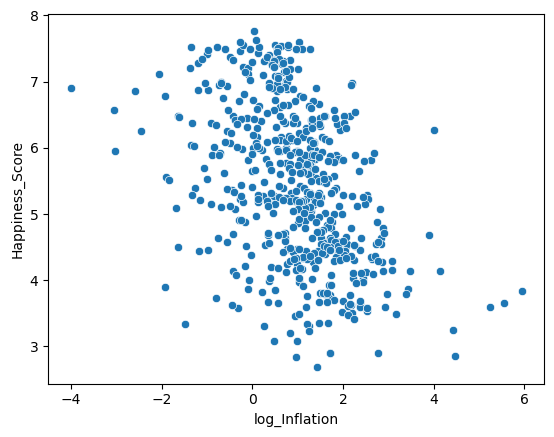

In [14]:
# Create the new variable log_inflation:
happy_inflation["log_Inflation"] = np.log(happy_inflation["Inflation"] + 0.01)

# Create a plot with log_Inflation on the x axis and happiness on the y axis:
ex8_plot = sns.scatterplot(x = "log_Inflation", y = "Happiness_Score",
                           data = happy_inflation)
ex8_plot

# You can see no clear (only a weak) correlation between the happiness score and the logarithmic 
# inflation rate, as seen before in the previous exercises.

<div class="alert alert-block alert-info">

* Return to the simple linear model you estimated in Problem 4. Add a regression line calculated from this model specification but using $\mathrm{log}(\mathit{inflation} + 0.01)$ to the plot from part a) of this problem. Do not include confidence intervals.

</div>